# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and we are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [1]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestNeighbors
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display


# Import sys so no warnings will be issued
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# Libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth
from numpy import sqrt, argmax, mean, absolute, std

# For graphing and chart plotting
import matplotlib.pyplot as plt

# Restarting the kernel after the installation to avoid errors that some graphs are not recognised (e.g. histplot)
#!pip install seaborn --upgrade
!pip install -U seaborn
import seaborn as sns

# Spliting the dataset for training, validation and testing
from sklearn.model_selection import train_test_split

# Importing scikit-learn module for calculating various performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.metrics import multilabel_confusion_matrix

# Optimising hyperparameters
from sklearn.model_selection import GridSearchCV

# Label encoding, feauture scaling
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Feature selection 
from sklearn.feature_selection import chi2

# Imputing missing values
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Checking collinearity between features
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Evaluating information gained for feature selection and feature importance
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import mutual_info_classif

# Creating pipelines
from sklearn.pipeline import Pipeline

# Cross validation of models
from sklearn.model_selection import cross_val_score


## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')
df.head()


,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


We rename the colums to make the code look more consistent with its style.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})


In [5]:
df.sample(10)


,gender,age,income,family_members,insurance_benefits
770,1,47.0,43400.0,1,1
1273,1,28.0,57600.0,2,0
3306,0,31.0,36900.0,0,0
2178,0,18.0,43400.0,1,0
4267,1,26.0,41000.0,0,0
1373,0,40.0,52000.0,0,0
3312,1,38.0,52000.0,1,0
261,1,29.0,45200.0,1,0
4821,1,27.0,55900.0,0,0
1705,0,29.0,32100.0,2,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# Fixing the age type to an interger
df['age'] = df['age'].astype(int)


In [8]:
# Checking info again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# Now we have a look at the data's descriptive statistics. 
# Does everything look okay?
df.describe()


,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


### Conclusion
* Dataset shape is 5000 rows with 5 columns and no missing values.

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

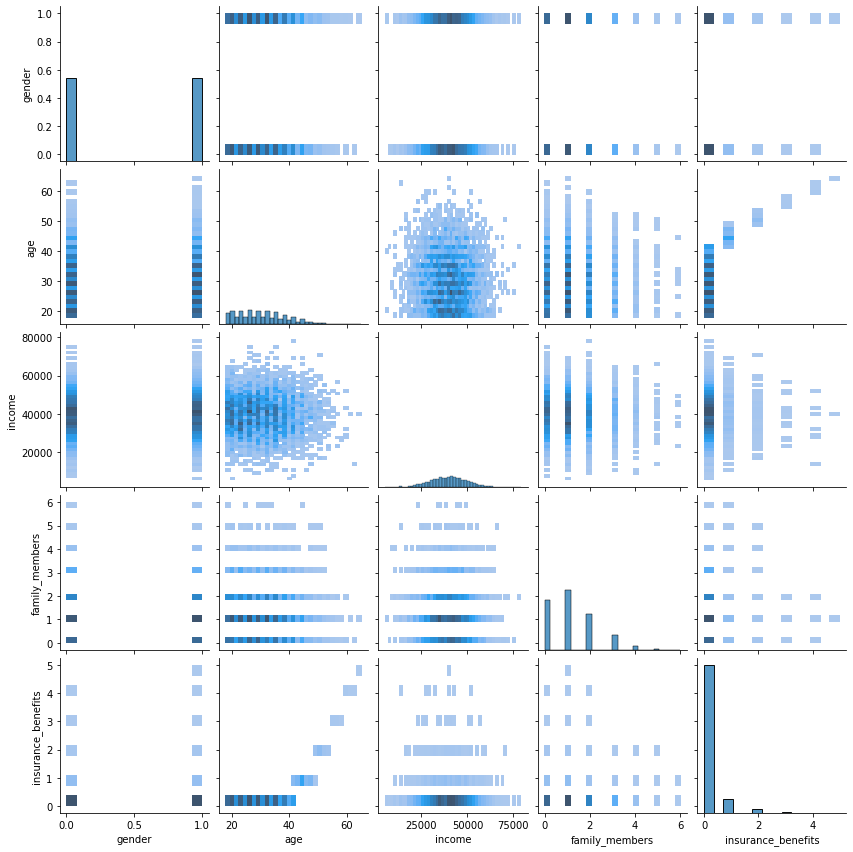

In [10]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)


* The 'age' feature variable has the strongest correlation with target variable.
* No outliers are observed.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?


In [11]:
feature_names = ['gender', 'age', 'income', 'family_members']


In [12]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = KNeighborsRegressor(metric=metric)
    nbrs.fit(df[feature_names], df.drop(feature_names, axis=1))
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res


Scaling the data.

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


In [14]:
df_scaled.sample(5)


,gender,age,income,family_members,insurance_benefits
4934,1.0,0.384615,0.343038,0.500000,0
3738,1.0,0.292308,0.737975,0.000000,0
4909,1.0,0.646154,0.577215,0.333333,0
3355,0.0,0.446154,0.400000,0.000000,0
2790,0.0,0.646154,0.506329,0.166667,1


Now, let's get similar records for a given one for every combination

In [15]:
%time
print()

# Data not scaled + Euclidean distance metric
data = df
n = 5 # the n-th customer for whom other similar customers are going to be searched 
k = 10 # the number of the nearest neighbours to return (including the n-th customer)
metric = 'euclidean'

print('the {:}-th target customer:'.format(n))
print(data.iloc[n][feature_names])
print()
print('the', k, 'most similar customers:')
get_knn(data, n, k, metric)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs

the 5-th target customer:
gender                1.0
age                  43.0
income            41000.0
family_members        2.0
Name: 5, dtype: float64

the 10 most similar customers:


,gender,age,income,family_members,insurance_benefits,distance
5,1,43,41000.0,2,1,0.000000
1995,0,45,41000.0,0,1,3.000000
3972,1,40,41000.0,1,0,3.162278
3801,0,46,41000.0,2,1,3.162278
4763,1,46,41000.0,1,1,3.162278
2759,0,47,41000.0,3,1,4.242641
2717,0,37,41000.0,0,0,6.403124
3434,1,36,41000.0,2,0,7.000000
1740,0,36,41000.0,1,0,7.141428
2876,0,35,41000.0,2,0,8.062258


In [16]:
%time
print()

# Data not scaled + Manhattan distance metric
data = df
n = 5 # the n-th customer for whom other similar customers are going to be searched 
k = 10 # the number of the nearest neighbours to return (including the n-th customer)
metric = 'manhattan'

print('the {:}-th target customer:'.format(n))
print(data.iloc[n][feature_names])
print()
print('the', k, 'most similar customers:')
get_knn(data, n, k, metric)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs

the 5-th target customer:
gender                1.0
age                  43.0
income            41000.0
family_members        2.0
Name: 5, dtype: float64

the 10 most similar customers:


,gender,age,income,family_members,insurance_benefits,distance
5,1,43,41000.0,2,1,0.0
4763,1,46,41000.0,1,1,4.0
3972,1,40,41000.0,1,0,4.0
3801,0,46,41000.0,2,1,4.0
1995,0,45,41000.0,0,1,5.0
2759,0,47,41000.0,3,1,6.0
3434,1,36,41000.0,2,0,7.0
2717,0,37,41000.0,0,0,9.0
2876,0,35,41000.0,2,0,9.0
1740,0,36,41000.0,1,0,9.0


In [17]:
%time
print()

# Data scaled + Euclidean distance metric
data = df_scaled
n = 5 # the n-th customer for whom other similar customers are going to be searched 
k = 10 # the number of the nearest neighbours to return (including the n-th customer)
metric = 'euclidean'

print('the {:}-th target customer:'.format(n))
print(data.iloc[n][feature_names])
print()
print('the', k, 'most similar customers:')
get_knn(data, n, k, metric)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs

the 5-th target customer:
gender            1.000000
age               0.661538
income            0.518987
family_members    0.333333
Name: 5, dtype: float64

the 10 most similar customers:


,gender,age,income,family_members,insurance_benefits,distance
5,1.0,0.661538,0.518987,0.333333,1,0.000000
1147,1.0,0.646154,0.516456,0.333333,0,0.015592
4074,1.0,0.661538,0.501266,0.333333,1,0.017722
1019,1.0,0.646154,0.501266,0.333333,0,0.023468
2962,1.0,0.630769,0.520253,0.333333,0,0.030795
2128,1.0,0.692308,0.512658,0.333333,1,0.031413
106,1.0,0.692308,0.526582,0.333333,1,0.031693
2206,1.0,0.692308,0.530380,0.333333,1,0.032811
2352,1.0,0.692308,0.531646,0.333333,1,0.033271
719,1.0,0.630769,0.532911,0.333333,0,0.033773


In [18]:
%time
print()

# Data scaled + Manhattan distance metric
data = df_scaled
n = 5 # the n-th customer for whom other similar customers are going to be searched 
k = 10 # the number of the nearest neighbours to return (including the n-th customer)
metric = 'manhattan'

print('the {:}-th target customer:'.format(n))
print(data.iloc[n][feature_names])
print()
print('the', k, 'most similar customers:')
get_knn(data, n, k, metric)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs

the 5-th target customer:
gender            1.000000
age               0.661538
income            0.518987
family_members    0.333333
Name: 5, dtype: float64

the 10 most similar customers:


,gender,age,income,family_members,insurance_benefits,distance
5,1.0,0.661538,0.518987,0.333333,1,0.000000
4074,1.0,0.661538,0.501266,0.333333,1,0.017722
1147,1.0,0.646154,0.516456,0.333333,0,0.017916
2962,1.0,0.630769,0.520253,0.333333,0,0.032035
1019,1.0,0.646154,0.501266,0.333333,0,0.033106
2128,1.0,0.692308,0.512658,0.333333,1,0.037098
106,1.0,0.692308,0.526582,0.333333,1,0.038364
2206,1.0,0.692308,0.530380,0.333333,1,0.042162
2352,1.0,0.692308,0.531646,0.333333,1,0.043427
719,1.0,0.630769,0.532911,0.333333,0,0.044693


**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

The above is the result of finding 10 most simialr neighbours to the 5-th observation in the dataset. Four cases were tested:
1) Data not scaled; distance metric = Euclidean

2) Data not scaled; distance metric = Manhattan

3) Data scaled; distance metric = Euclidean

4) Data scaled; distance metric = Manhattan

The same k most similar neighbours appeared in the list regardless of the distance metric used, but the ordering was much different when the data was not scaled.
* When the data was not scaled, 3 out of 10 neighbours appeared in the same order in the two distance metrics.
* When the data was scaled, 5 out of 10 neighbours appeared in the same order in the two distance metrics.

The CPU Time was the same for all four cases. But there was a difference in the Wall Time.
* When the data was not scaled, the Manhattan ran faster than the Euclidean.
* When the data was scaled, the Euclidean ran faster than the Manhattan.

Given the list of 10 most similar neighbours proposed by the model, the Manhattan seems to produce a more accurate result than the Euclidean, regardless of whether the data is scaled or not.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

* The Manhattan result from the non-scaled data has nothing in common with the Mahattan result from the scaled data. The two lists of 10 similar neighbours are completely different and the same can be said about the Euclidean results.

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [19]:
# Calculating the target
df['insurance_benefits_received'] = df['insurance_benefits'].clip(0, 1)
df['insurance_benefits_received'].sample(10)


1050    0
4640    1
4850    0
3111    0
1229    1
4222    0
1966    0
503     0
3242    0
1331    0
Name: insurance_benefits_received, dtype: int64

In [20]:
# Checking for the class imbalance with value_counts()
df['insurance_benefits_received'].value_counts()


0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [21]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# If we have an issue with the following line, we should restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)
    
# [my addition] print the numbers with the labels
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    print('True negatives:', tn)
    print('False positives:', fp)
    print('False negatives:', fn)
    print('True positives:', tp)
    print('Precision:', tp/(tp + fp))
    print('Recall:', tp/(tp + fn))
    print()


In [22]:
# Generating the output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)


In [23]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, 5000)
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()
    

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]
True negatives: 0.8872
False positives: 0.0
False negatives: 0.1128
True positives: 0.0
Precision: nan
Recall: 0.0


The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]
True negatives: 0.7914
False positives: 0.0958
False negatives: 0.0994
True positives: 0.0134
Precision: 0.12271062271062272
Recall: 0.11879432624113476


The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]
True negatives: 0.456
False positives: 0.4312
False negatives: 0.053
True positives: 0.0598
Precision: 0.12179226069246435
Recall: 0.5301418439716312


The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]
True negatives: 0.0
False positives: 0.8872
False negatives: 0.0
True positives: 0.1128
Precision: 0.1128
Recall: 1.0




In [24]:
# Writing a function that splits the whole dataset into training and test datasets in the ratio of 70:30
def split_data(source, target_col, train_portion):

        # separate the source dataset into features and target datasets
        X = source.drop([target_col], axis=1)
        y = source[target_col]    
        
        # split the features and target datasets into training and test datasets 
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_portion, random_state=12345)    

        # return all the datasets
        return X_train, X_test, y_train, y_test
    

In [25]:
train_segment = 0.7 # 1-0.7=0.3 is set aside for test dataset

X_train, X_test, y_train, y_test  = split_data(df, 'insurance_benefits_received', train_segment)
X_train.drop(columns=['insurance_benefits'], inplace=True)
X_test.drop(columns=['insurance_benefits'], inplace=True)


In [26]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (3500, 4)
y_train shape: (3500,)
X_test shape: (1500, 4)
y_test shape: (1500,)


In [27]:
for k in range(1, 11, 1):   
    print('k:', k)
    kn_clf = KNeighborsClassifier(n_neighbors=k)
    kn_clf.fit(X_train, y_train)
    pred = kn_clf.predict(X_test)
    eval_classifier(y_test, pred)
    

k: 1
F1: 0.62
Confusion Matrix
[[0.87133333 0.02      ]
 [0.05133333 0.05733333]]
True negatives: 0.8713333333333333
False positives: 0.02
False negatives: 0.051333333333333335
True positives: 0.05733333333333333
Precision: 0.7413793103448275
Recall: 0.5276073619631902

k: 2
F1: 0.41
Confusion Matrix
[[0.88733333 0.004     ]
 [0.08       0.02866667]]
True negatives: 0.8873333333333333
False positives: 0.004
False negatives: 0.08
True positives: 0.028666666666666667
Precision: 0.8775510204081634
Recall: 0.2638036809815951

k: 3
F1: 0.41
Confusion Matrix
[[0.88       0.01133333]
 [0.07733333 0.03133333]]
True negatives: 0.88
False positives: 0.011333333333333334
False negatives: 0.07733333333333334
True positives: 0.03133333333333333
Precision: 0.734375
Recall: 0.2883435582822086

k: 4
F1: 0.28
Confusion Matrix
[[0.88866667 0.00266667]
 [0.09066667 0.018     ]]
True negatives: 0.8886666666666667
False positives: 0.0026666666666666666
False negatives: 0.09066666666666667
True positives: 0

In [28]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
for k in range(1, 11, 1):   
    print('k:', k)
    kn_clf = KNeighborsClassifier(n_neighbors=k)
    kn_clf.fit(X_train_scaled, y_train)
    pred = kn_clf.predict(X_test_scaled)
    eval_classifier(y_test, pred)
    

k: 1
F1: 0.96
Confusion Matrix
[[0.88733333 0.004     ]
 [0.00466667 0.104     ]]
True negatives: 0.8873333333333333
False positives: 0.004
False negatives: 0.004666666666666667
True positives: 0.104
Precision: 0.9629629629629629
Recall: 0.9570552147239264

k: 2
F1: 0.93
Confusion Matrix
[[8.90666667e-01 6.66666667e-04]
 [1.33333333e-02 9.53333333e-02]]
True negatives: 0.8906666666666667
False positives: 0.0006666666666666666
False negatives: 0.013333333333333334
True positives: 0.09533333333333334
Precision: 0.9930555555555556
Recall: 0.8773006134969324

k: 3
F1: 0.94
Confusion Matrix
[[0.888      0.00333333]
 [0.00866667 0.1       ]]
True negatives: 0.888
False positives: 0.0033333333333333335
False negatives: 0.008666666666666666
True positives: 0.1
Precision: 0.967741935483871
Recall: 0.9202453987730062

k: 4
F1: 0.90
Confusion Matrix
[[0.88933333 0.002     ]
 [0.01733333 0.09133333]]
True negatives: 0.8893333333333333
False positives: 0.002
False negatives: 0.017333333333333333
Tr

### Conclusion
* When the data is not scaled, as k increases, F1 decreases. When k=10, F1=0, so precision is high for all values of k, but recall is gets poorer. This is presumably because it becomes more and more difficult to calculate the distane between the data points.

* In constrast, when the data is scaled, the increase in k barely affects F1, which remains high, and so precision and recall at a near perfect level (very close to 1.0).

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [30]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ (y)

    def predict(self, X):
        
        # Adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred
    

In [31]:
def eval_regressor(y_true, y_pred):
    
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = np.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')
    

In [32]:
# Data not scaled
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)


[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [33]:
# Creating a pipeline to perform feature scaling and training the model on the scaled training dataset
lr_pipe = Pipeline([
    ('scaler', StandardScaler()), # feature scaling
    ('model_scaled', MyLinearRegression()) # create an instance of the model
])

# Fitting the model
lr_pipe.fit(X_train, y_train)
print('parameter weights:', lr_pipe.named_steps['model_scaled'].weights)

# Testing the model on the test dataset that has been scaled
y_test_pred = lr_pipe.predict(X_test)
eval_regressor(y_test, y_test_pred)


parameter weights: [ 0.14971429  0.30292778  0.0082117  -0.00258294 -0.01271039]
RMSE: 0.34
R2: 0.66


 ### Conclusion
* When the data is scaled, the parameter weights are more realistic than when the data is not scaled, raising the model interpretability.
* We can see from the sizes of the weights that the parameters influence of target variable in the order of 'age', 'gender', 'family_members', 'income'.
* r2=0.66 indicates an above-average correlation strength between the set of features and the target. If the dataset had started out with many more variables in it, whoever did the feature selection did a good job at narrowing the list down to he four most influencial variables that help predict that target.

# Task 4. Obfuscating Data

It's best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [34]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]


In [35]:
X = df_pn.to_numpy()


Generating a random matrix $P$.

In [36]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P


array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

Checking the matrix $P$ is invertible

In [37]:
# Finding the inverse matrix of P - if the matrix is non-invertible, an error will be issued
P_inverse = np.linalg.inv(P)
print('inverse matrix of P:')
print(P_inverse)


inverse matrix of P:
[[ 0.41467992 -1.43783972  0.62798546  1.14001268]
 [-1.06101789  0.44219337  0.1329549   1.18425933]
 [ 1.42362442  1.60461607 -2.0553823  -1.53699695]
 [-0.11128575 -0.65813802  1.74995517 -0.11816316]]


Can you guess the customers' ages or income after the transformation?

In [38]:
# Obfuscating data
X_obfuscated = X @ P
X_obfuscated


array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

In [39]:
# Printing the original data
X


array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Can we recover the original data from $X'$ if you know $P$? Try checking with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [40]:
X_recovered = X_obfuscated @ P_inverse
X_recovered


array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [ 1.67952800e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-6.23021448e-13,  2.90000000e+01,  2.10000000e+04,
        -2.03032656e-13],
       ...,
       [ 1.57996161e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [41]:
# Randomly sampling a few customers from the original data
original_sample = df[personal_info_column_list].sample(10)

# Locating the transformed data for these customers
customers = original_sample.index
X_obs = X_obfuscated[customers]

# Locating the recovered data for these customers
X_rec = X_recovered[customers]

# Rounding off then converting to an integer
X_rec_rounded = np.around(X_recovered[customers]).astype(int)


In [42]:
# Writing a function to create a comparison table between the original, obfuscated and recovered data for a specified customer
def comparison_table(num):
    orig = pd.Series(original_sample.iloc[num])
    obs = pd.Series(X_obs[num], index=['gender', 'age', 'income', 'family_members'])
    pre_rec = pd.Series(X_rec[num], index=['gender', 'age', 'income', 'family_members'])
    rec = pd.Series(X_rec_rounded[num], index=['gender', 'age', 'income', 'family_members'])
    customer = pd.concat([orig, obs, pre_rec, rec], axis=1)
    customer.columns = ['original', 'obfuscated', 'recovered (pre-round)', 'recovered']
    print(customer)
    

In [43]:
# customer number 3326 (index = 1)
comparison_table(1)


                original    obfuscated  recovered (pre-round)  recovered
gender               1.0   5015.056442                    1.0          1
age                 33.0  17645.192873                   33.0         33
income           39100.0  14525.509198                39100.0      39100
family_members       3.0  36263.830270                    3.0          3


In [44]:
# customer number 1628 (index = 8)
comparison_table(8)


                original    obfuscated  recovered (pre-round)  recovered
gender               1.0   5334.241148                    1.0          1
age                 35.0  18771.463439                   35.0         35
income           41600.0  15453.139710                41600.0      41600
family_members       1.0  38581.860394                    1.0          1


In [45]:
# customer number 3785 (index = 4)
comparison_table(4)


                original    obfuscated  recovered (pre-round)  recovered
gender               1.0   5255.881507           1.000000e+00          1
age                 26.0  18491.628513           2.600000e+01         26
income           41000.0  15223.367224           4.100000e+04      41000
family_members       0.0  38018.499583          -2.888404e-12          0


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

* The discrepancies are due to the limitation of float values which are never the exact values, and containing some error. Looking at the recovered matrix X very leniently, the similarity in the values are within an acceptable range.

* Once the recovered values are converted to integer, they are the same as the original. (ie. 40200.0 and 40200)

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

* How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

$w$ and $w_P$ are both weight vectors. The former is in a simple linear regression equation $X w = y$. The latter is the weight vector of a very similar simple linear regression equation $(XP) w_P = y_p$ where the feature matrix X has some matrix P applied to it.

* What would be predicted values with $w_P$? 

$y$ in the equation $(XP) w_P = y$ will be the predicted values. 

* What does that mean for the quality of linear regression if you measure it with RMSE?

The predictions of the model trained on obfuscated data are exactly the same as the predictions of the model trained on original data $\hat{y_p} = Xw = y$, and therefore the RMSE cannot change.



**Analytical proof**

$w_P = [(XP)^T XP]^{-1} (XP)^T y$

$w_P = [P^T X^T XP]^{-1} (XP)^T y$

$w_P = [P^{-1} (X^T X)^{-1} (P^T)^{-1}] (P^T X^T)y$

$w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T)y$......$(P^T)^{-1} P^T = I$ because it's square

$w_P = P^{-1}(X^T X)^{-1} X^T y$......$(X^T X)^{-1} X^T y = w$

$w_P = P^{-1} w$.....expressing $w_P$ in terms of $w$

Then we can plug the above into the predictions of the model trained on the obfuscated matrix $\hat{y_p} = XPw_p$

$\hat{y_p} = XPw_P$...where $w_P = P^{-1} w$

$\hat{y_p} = XPP^{-1} w$...where $PP^{-1} = I$ because it is square

$\hat{y_p} = Xw = y$

The predictions of the model trained on obfuscated data are exactly the same as the predictions of the model trained on the original data, and therefore the RMSE can't change.


## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- Obfuscate the data by multiplying the numerical features by the invertible matrix 𝑃.
- Use $XP$ as the new feature matrix

In [46]:
# Spliting the original data into training and test datasets
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)


In [47]:
# Checking shape
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (3500, 4)
y_train shape: (3500,)
X_test shape: (1500, 4)
y_test shape: (1500,)


In [48]:
# Creating a square matrix 𝑃 of random numbers
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X_train.shape[1], X_train.shape[1]))
P # P is an n x n matrix where n=4


array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [49]:
# Finding the inverse matrix of P - if the matrix is non-invertible, an error will be issued
P_inverse = np.linalg.inv(P)
print('inverse matrix of P:')
print(P_inverse)


inverse matrix of P:
[[ 0.41467992 -1.43783972  0.62798546  1.14001268]
 [-1.06101789  0.44219337  0.1329549   1.18425933]
 [ 1.42362442  1.60461607 -2.0553823  -1.53699695]
 [-0.11128575 -0.65813802  1.74995517 -0.11816316]]


In [50]:
# Preparing an obfuscated version of the training and test datasets by multiplying the numerical features by the invertible matrix P
X_train_obf = X_train @ P
X_test_obf = X_test @ P


In [51]:
# The benchmark - training linear regression model on the non-obfuscated training dataset and test on the test dataset
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_test_pred_reg = lr_reg.predict(X_test)
eval_regressor(y_test, y_test_pred_reg)


RMSE: 0.34
R2: 0.66


In [52]:
# Training the model on the obfuscated training dataset and test on the obfuscated test dataset
lr_obf = LinearRegression()
lr_obf.fit(X_train_obf, y_train)
y_test_pred_obf = lr_obf.predict(X_test_obf)
eval_regressor(y_test, y_test_pred_obf)


RMSE: 0.34
R2: 0.66


### Conclusions
* "The benchmark" was the training and test datasets that were both not obfuscated: this is the scenario from earlier where data masking is not applied.

* Training and test datasets that were both obfuscated: this performance quality was identical to the benchmark.

#  Overall Conclusions

1. Dataset shape is 5000 rows with 5 columns and no missing values.
2. The 'age' feature variable has the strongest correlation with target variable.
3. No outliers are observed.
4. When the data is not scaled, as k increases, F1 decreases. When k=10, F1=0, so precision is high for all values of k, but recall is gets poorer. This is presumably because it becomes more and more difficult to calculate the distane between the data points.
5. In constrast, when the data is scaled, the increase in k barely affects F1, which remains high, and so precision and recall at a near perfect level (very close to 1.0).
7. We can see from the sizes of the weights that the parameters influence of target variable in the order of 'age', 'gender', 'family_members', 'income'.
8. r2=0.66 indicates an above-average correlation strength between the set of features and the target. If the dataset had started out with many more variables in it, whoever did the feature selection did a good job at narrowing the list down to he four most influencial variables that help predict that target.
9. "The benchmark" was the training and test datasets that were both not obfuscated: this is the scenario from earlier where data masking is not applied.
10. Training and test datasets that were both obfuscated: this performance quality was identical to the benchmark.


# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>